# Yelp frienship networks
The jupyter notebook mainly consists of two parts:  
(1) Clean the data given by Yelp  
(2) Construct ego-networks of friendship  

In [60]:
import json, csv
import pandas as pd
import numpy as np

## Import the dataset

In [11]:
users = []
with open('yelp_academic_dataset_user.json') as fl:
    for i, line in enumerate(fl):
        users.append(json.loads(line))
df = pd.DataFrame(users)

In [12]:
df.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [61]:
df.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,friend_count
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,55,56,18,232,844,467,467,239,180,14995
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,184,157,251,1847,7054,3131,3131,1521,1946,4646
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,10,17,3,66,96,119,119,35,18,381
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,1,6,2,12,16,26,26,10,9,131
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,0,0,0,1,1,0,0,0,0,27


In [14]:
df.iloc[1]

user_id                                          j14WgRoU_-2ZE1aw1dXrJg
name                                                             Daniel
review_count                                                       4333
yelping_since                                       2009-01-25 04:35:42
useful                                                            43091
funny                                                             13066
cool                                                              27281
elite                 2009,2010,2011,2012,2013,2014,2015,2016,2017,2...
friends               ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...
fans                                                               3138
average_stars                                                      3.74
compliment_hot                                                     1145
compliment_more                                                     264
compliment_profile                                              

## Explore the data for constructing networks.

In [87]:
## Increase the count of friends as a column in the dataset for selecting users to construct ego-networks.

friend_count = [0 for _ in range(len(df))]
for i in range(len(df)):
    friend_count[i] = len(df.loc[i, "friends"].split(", "))
    
friend_count = pd.DataFrame(friend_count)
df['friend_count'] = friend_count


In [92]:
df['friend_count'][0:20]

0     14995
1      4646
2       381
3       131
4        27
5      5843
6        23
7        82
8       488
9        64
10      241
11      356
12      154
13       64
14       14
15      187
16       13
17       84
18      487
19      133
Name: friend_count, dtype: int64

In [89]:
# Records all the users in the dataset in a list
user_all = df['user_id'].tolist()

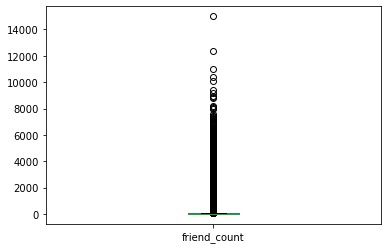

In [88]:
# Explore the distribution of the frienscount
df['friend_count'].plot.box();

In [93]:
# Combined with the distribution of friends count, select 5 users as starting nodes in ego-networks.
for i in [3,5,6,7,8]:
    print(df.iloc[i]['friend_count'])

131
5843
23
82
488


## Construct Ego-networks

In [25]:
def get_friends(i,filename):
    '''
    Input:
        i: the ith user in the yelp user dataset
        filename: the name of output file ("edge_yelp_ui.csv")
    Output:
        a csv file of edge
    '''
   
        
    # enlarge the circle from no.i user
    w = csv.writer(open(filename, "w"))

    # the first layer
    user1 = df.iloc[i]['user_id']
    lst1_friends = df.iloc[i]['friends'].split(", ")
    if len(lst1_friends)>100:
        for f1 in lst1_friends[0:100]:
            if f1 in user_all:
        #         print((user1,f1))
                with open(filename,'a') as cfa:
                    wf = csv.writer(cfa)
                    wf.writerow([user1, f1])
    if len(lst1_friends)<=100:
        for f1 in lst1_friends:
            if f1 in user_all:
        #         print((user1,f1))
                with open(filename,'a') as cfa:
                    wf = csv.writer(cfa)
                    wf.writerow([user1, f1])



    for f1 in lst1_friends[0:100]:
        if f1 in user_all:
            lst2_friends = df[df['user_id']==f1]['friends'].tolist()[0].split(", ")         
            if len(lst2_friends)>100:
                for f2 in lst2_friends[0:100]:
                    if f2 in user_all:
        #                 print((f1,f2))
                        with open(filename,'a') as cfa:
                            wf = csv.writer(cfa)
                            wf.writerow([f1,f2])
            if len(lst2_friends)<=100:
                for f2 in lst2_friends:
                    if f2 in user_all:
        #                 print((f1,f2))
                        with open(filename,'a') as cfa:
                            wf = csv.writer(cfa)
                            wf.writerow([f1,f2])

    for f2 in lst2_friends[0:100]:
        if f2 in user_all:
            lst3_friends = df[df['user_id']==f2]['friends'].tolist()[0].split(", ")
            if len(lst3_friends)>100:
                for f3 in lst3_friends[0:100]:
                    if f3 in user_all:
        #                 print((f2,f3))
                        with open(filename,'a') as cfa:
                            wf = csv.writer(cfa)
                            wf.writerow([f2, f3])
            if len(lst3_friends)<=100:
                for f3 in lst3_friends:
                    if f3 in user_all:
        #                 print((f2,f3))
                        with open(filename,'a') as cfa:
                            wf = csv.writer(cfa)
                            wf.writerow([f2, f3])
            

In [35]:
def attribute(filename_in, filename_out):
    '''
    Input:
        filename_in: the name of file records the edge ("edge_yelp_ui.csv")
        filename_out: the name of file records the edge ("attribute_yelp_ui.csv")
    Output:
        a csv file of attribute
    '''
    edge_df = pd.read_csv(filename_in)
    all_id=[]
    for i in range(len(edge_df)):
        if edge_df.iloc[i]['Node1'] not in all_id:
            all_id.append(edge_df.iloc[i]['Node1'])
        if edge_df.iloc[i]['Node2'] not in all_id:
            all_id.append(edge_df.iloc[i]['Node2'])
    lst_count=[]
    lst_star=[]
    lst_friend=[]
    for i in all_id:
        lst_count.extend(df[df['user_id']==i]['review_count'].tolist())
        lst_star.extend(df[df['user_id']==i]['average_stars'].tolist())
        lst_friend.extend(df[df['user_id']==i]['friend_count'].tolist())
    w = csv.writer(open(filename_out, "w"))
    for i in range(len(lst_count)):
        w.writerow([all_id[i], lst_count[i],lst_star[i],lst_friend[i]])
    

In [59]:
get_friends(3,"edge_yelp_u3.csv")

In [50]:
get_friends(5,"edge_yelp_u5.csv")

In [53]:
get_friends(6,"edge_yelp_u6.csv")

In [54]:
get_friends(7,"edge_yelp_u7.csv")

In [62]:
get_friends(8,"edge_yelp_u8.csv")

Before obtaining the attribute file, I manually cleaned the output file of edge to remove the garbage

In [36]:
attribute("edge_yelp_u3.csv", "attribute_yelp_u3.csv")

In [52]:
attribute("edge_yelp_u5.csv", "attribute_yelp_u5.csv")

In [55]:
attribute("edge_yelp_u6.csv", "attribute_yelp_u6.csv")

In [57]:
attribute("edge_yelp_u7.csv", "attribute_yelp_u7.csv")

In [64]:
attribute("edge_yelp_u8.csv", "attribute_yelp_u8.csv")